In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

In [2]:
#loading data
members = pd.read_csv("members_v3.csv") 
print("**********Shape of Data**********")
print(members.shape)
print("***********Data Types************")
print(members.dtypes)

**********Shape of Data**********
(6769473, 6)
***********Data Types************
msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
dtype: object


In [3]:
transactions = pd.read_csv("transactions.csv") 
print("**********Shape of Data**********")
print(transactions.shape)
print("***********Data Types************")
print(transactions.dtypes)

**********Shape of Data**********
(21547746, 9)
***********Data Types************
msno                      object
payment_method_id          int64
payment_plan_days          int64
plan_list_price            int64
actual_amount_paid         int64
is_auto_renew              int64
transaction_date           int64
membership_expire_date     int64
is_cancel                  int64
dtype: object


In [4]:
userlogs = pd.read_csv("user_logs_v2.csv") 
print("**********Shape of Data**********")
print(userlogs.shape)
print("***********Data Types************")
print(userlogs.dtypes)

**********Shape of Data**********
(18396362, 9)
***********Data Types************
msno           object
date            int64
num_25          int64
num_50          int64
num_75          int64
num_985         int64
num_100         int64
num_unq         int64
total_secs    float64
dtype: object


In [5]:
#loading data
train = pd.read_csv("train.csv") 
print("**********Shape of Data**********")
print(train.shape)
print("***********Data Types************")
print(train.dtypes)

**********Shape of Data**********
(992931, 2)
***********Data Types************
msno        object
is_churn     int64
dtype: object


In [6]:
merged_inner = pd.merge(left=transactions,right=userlogs, left_on='msno', right_on='msno')

In [7]:
print("**********Shape of Data**********")
print(merged_inner.shape)
print("***********Data Types************")
print(merged_inner.dtypes)

**********Shape of Data**********
(243671636, 17)
***********Data Types************
msno                       object
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
date                        int64
num_25                      int64
num_50                      int64
num_75                      int64
num_985                     int64
num_100                     int64
num_unq                     int64
total_secs                float64
dtype: object


In [8]:
# Select rows 10000000 
down = merged_inner[0:10000000]

In [9]:
print("*********Missing values**********")
print(down.isnull().sum())
print("*********Null values*************")
print(down.isna().sum())

*********Missing values**********
msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
date                      0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_secs                0
dtype: int64
*********Null values*************
msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
date                      0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                

In [10]:
down.is_auto_renew.value_counts(dropna = False)

1    8964120
0    1035880
Name: is_auto_renew, dtype: int64

In [75]:
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0


In [76]:
print(training.shape)

(992931, 7)


In [77]:
#Changing the format of city and registered_via( except missing values) from float to int and changing blank values with NAN( for city, registered_via and gender)

training['city'] = training.city.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['registered_via'] = training.registered_via.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['gender']=training['gender'].fillna("NAN")
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 7 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null object
bd                        877161 non-null float64
gender                    992931 non-null object
registered_via            992931 non-null object
registration_init_time    877161 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.6+ MB


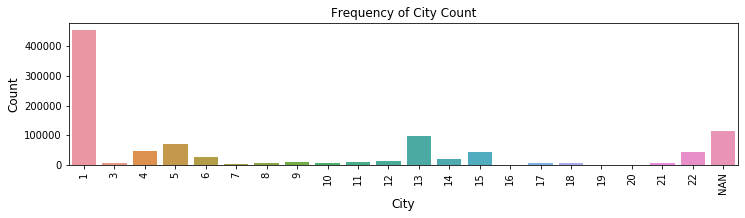

City Count [(1, 455389), ('NAN', 115770), (13, 98281), (5, 71299), (4, 47945), (15, 43356), (22, 42129), (6, 26022), (14, 20167), (12, 11554), (9, 9558), (11, 9036), (18, 7842), (8, 7690), (10, 6533), (17, 5546), (21, 5286), (3, 5089), (7, 2666), (16, 956), (20, 677), (19, 140)]


In [79]:
# City count
plt.figure(figsize=(12,12))
plt.subplot(411)
city_order = training['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=training , order = city_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count", fontsize=12)
plt.show()
city_count = Counter(training['city']).most_common()
print("City Count " +str(city_count))

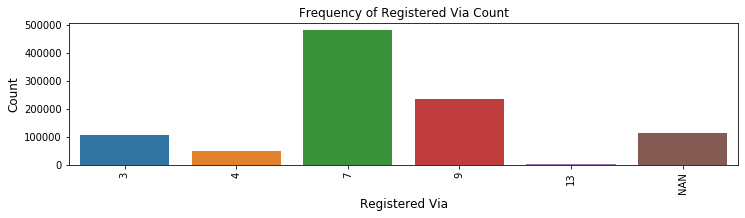

Registered Via Count [(7, 482726), (9, 236620), ('NAN', 115770), (3, 105445), (4, 49283), (13, 3087)]


In [80]:
#Registered Via Count
plt.figure(figsize=(12,12))
plt.subplot(412)
R_V_order = training['registered_via'].unique()
R_V_order = sorted(R_V_order, key=lambda x: str(x))
R_V_order = sorted(R_V_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="registered_via", data=training,order = R_V_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via Count", fontsize=12)
plt.show()
RV_count = Counter(training['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))

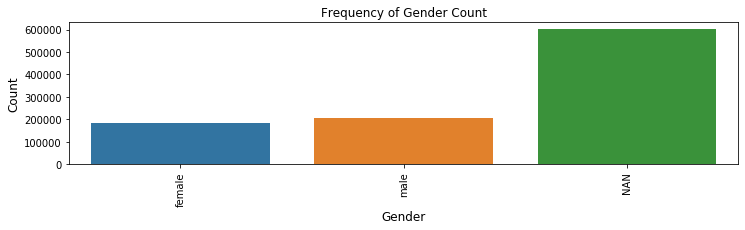

Gender Count [('NAN', 601239), ('male', 206284), ('female', 185408)]


In [81]:
#Gender count
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="gender", data=training)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender Count", fontsize=12)
plt.show()
gender_count = Counter(training['gender']).most_common()
print("Gender Count " +str(gender_count))


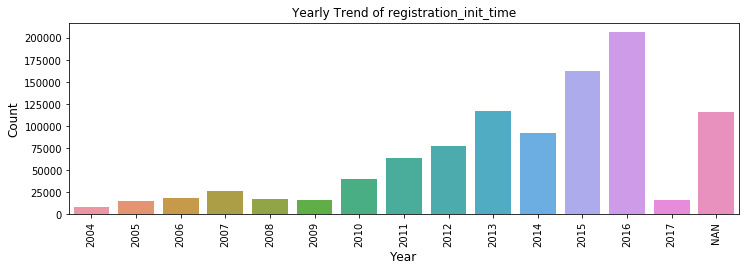

Yearly Count [(2016, 206892), (2015, 162008), (2013, 117059), ('NAN', 115770), (2014, 91680), (2012, 77280), (2011, 63379), (2010, 39906), (2007, 26355), (2006, 18193), (2008, 17725), (2017, 16691), (2009, 15804), (2005, 15759), (2004, 8430)]


In [82]:
#registration_init_time yearly trend
training['registration_init_time_year'] = pd.DatetimeIndex(training['registration_init_time']).year
training['registration_init_time_year'] = training.registration_init_time_year.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
year_count=training['registration_init_time_year'].value_counts()
#print(year_count)
plt.figure(figsize=(12,12))
plt.subplot(311)
year_order = training['registration_init_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
year_order = sorted(year_order, key=lambda x: float(x))
sns.barplot(year_count.index, year_count.values,order=year_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Yearly Trend of registration_init_time", fontsize=12)
plt.show()
year_count_2 = Counter(training['registration_init_time_year']).most_common()
print("Yearly Count " +str(year_count_2))

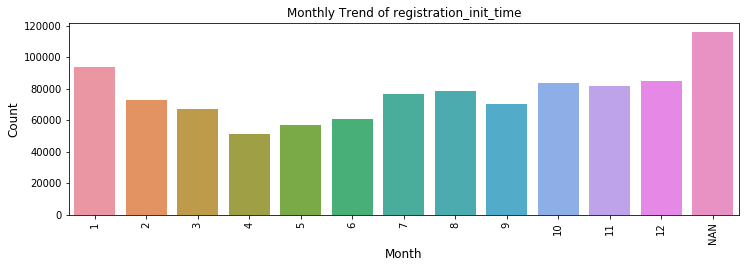

Monthly Count [('NAN', 115770), (1, 93707), (12, 84608), (10, 83335), (11, 81403), (8, 78424), (7, 76490), (2, 72651), (9, 70357), (3, 67086), (6, 60608), (5, 57224), (4, 51268)]


In [83]:
#registration_init_time monthly trend
training['registration_init_time_month'] = pd.DatetimeIndex(training['registration_init_time']).month
training['registration_init_time_month'] = training.registration_init_time_month.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
month_count=training['registration_init_time_month'].value_counts()
plt.figure(figsize=(12,12))
plt.subplot(312)
month_order = training['registration_init_time_month'].unique()
month_order = sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monthly Trend of registration_init_time", fontsize=12)
plt.show()
month_count_2 = Counter(training['registration_init_time_month']).most_common()
print("Monthly Count " +str(month_count_2))

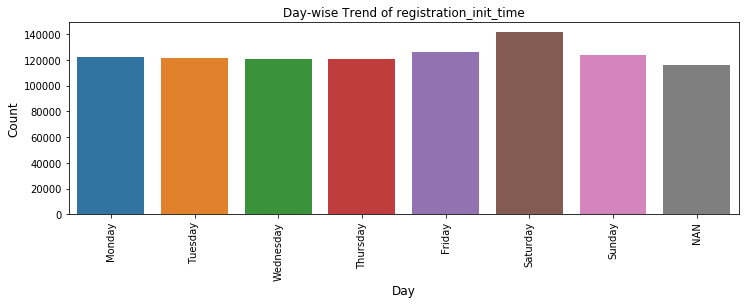

Day-wise Count [('Saturday', 141948), ('Friday', 126268), ('Sunday', 124120), ('Monday', 122189), ('Tuesday', 121536), ('Thursday', 120794), ('Wednesday', 120306), ('NAN', 115770)]


In [84]:
#registration_init_time day wise trend
training['registration_init_time_weekday'] = pd.DatetimeIndex(training['registration_init_time']).weekday_name
training['registration_init_time_weekday'] = training.registration_init_time_weekday.apply(lambda x: str(x) if pd.notnull(x) else "NAN" )
day_count=training['registration_init_time_weekday'].value_counts()
plt.figure(figsize=(12,12))
plt.subplot(313)
#day_order = training['registration_init_time_day'].unique()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','NAN']
sns.barplot(day_count.index, day_count.values,order=day_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Day-wise Trend of registration_init_time", fontsize=12)
plt.show()
day_count_2 = Counter(training['registration_init_time_weekday']).most_common()
print("Day-wise Count " +str(day_count_2))

In [91]:
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])
training_na = training.dropna()
training_na.shape

(391692, 7)

is_churn,0,1,Ratio
gender,,,
female,169395,16013,0.094531
male,188039,18245,0.097028


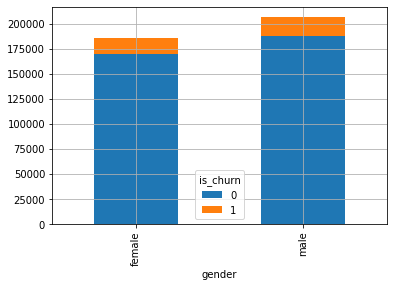

In [92]:
#Gender
gender_crosstab=pd.crosstab(training_na['gender'],training_na['is_churn'])
gender_crosstab.plot(kind='bar', stacked=True, grid=True)
gender_crosstab["Ratio"] =  gender_crosstab[1] / gender_crosstab[0]
gender_crosstab

is_churn,0,1,Ratio
registered_via,,,
3.0,76962,11131,0.144630
4.0,21217,4672,0.220201
7.0,73210,3071,0.041948
9.0,185799,15366,0.082702
13.0,246,18,0.073171


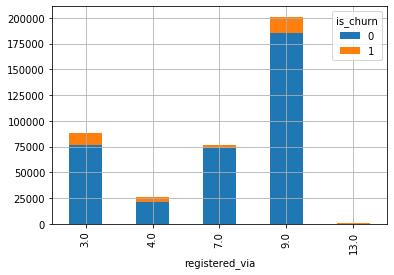

In [93]:
#Registered Via
registered_via_crosstab=pd.crosstab(training_na['registered_via'],training_na['is_churn'])
registered_via_crosstab.plot(kind='bar', stacked=True, grid=True)
registered_via_crosstab["Ratio"] =  registered_via_crosstab[1] / registered_via_crosstab[0]
registered_via_crosstab


is_churn,0,1,Ratio
city,,,
1.0,11357,2162,0.190367
3.0,4219,376,0.089121
4.0,39387,3866,0.098154
5.0,58356,5668,0.097128
6.0,21426,2037,0.095071
7.0,2228,163,0.073160
8.0,6315,685,0.108472
9.0,7788,699,0.089753
10.0,5390,540,0.100186


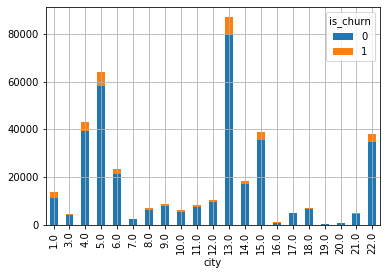

In [94]:
#city
city_crosstab=pd.crosstab(training_na['city'],training_na['is_churn'])
city_crosstab.plot(kind='bar', stacked=True, grid=True)
city_crosstab["Ratio"] =  city_crosstab[1] / city_crosstab[0]
city_crosstab

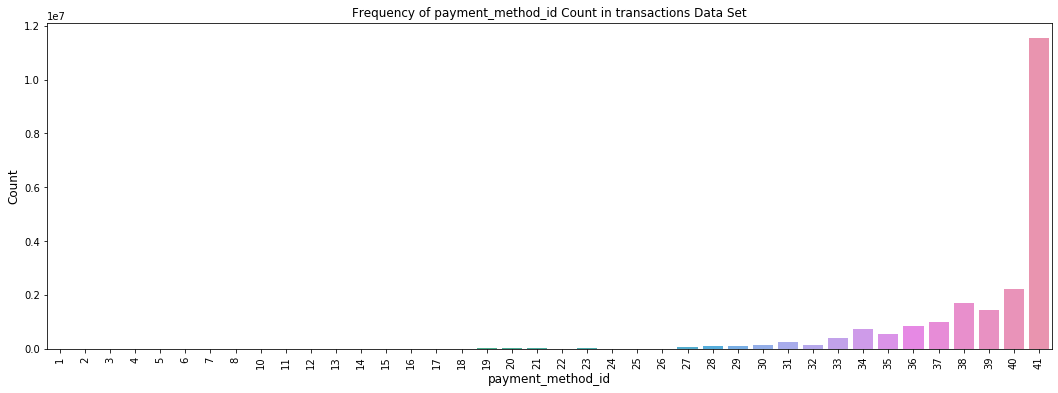

payment_method_id Count [(41, 11526454), (40, 2225283), (38, 1703590), (39, 1466655), (37, 1007689), (36, 855115), (34, 731539), (35, 541399), (33, 411164), (31, 252342), (30, 160957), (32, 146481), (29, 113885), (28, 95733), (27, 62525), (23, 42386), (19, 32073), (20, 28278), (21, 22883), (22, 20130), (24, 16196), (18, 16177), (25, 13780), (14, 13621), (16, 11064), (17, 7437), (13, 6571), (26, 4591), (12, 3834), (11, 2129), (15, 1479), (10, 1326), (7, 1094), (8, 657), (5, 474), (6, 466), (3, 210), (2, 52), (4, 15), (1, 12)]


In [95]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

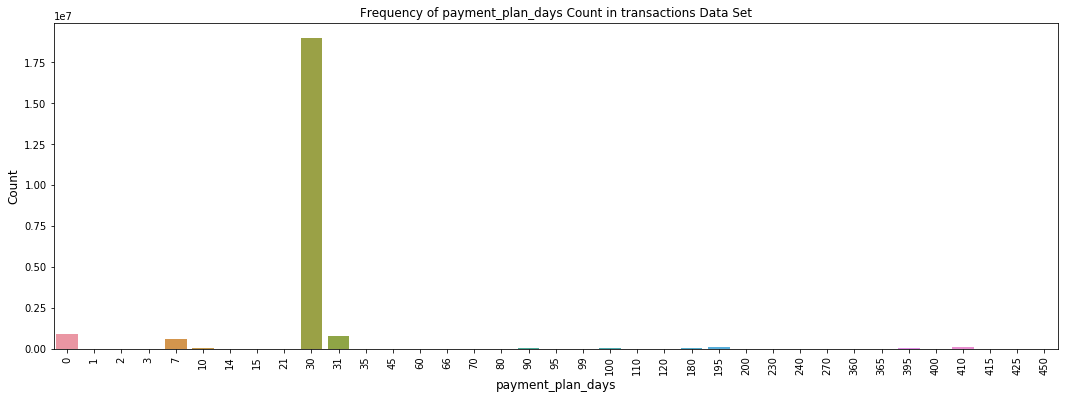

payment_plan_days Count [(30, 18956290), (0, 870124), (31, 766608), (7, 577639), (195, 110234), (410, 80139), (180, 52272), (10, 38216), (100, 24154), (90, 12310), (395, 10790), (120, 10007), (60, 7167), (14, 6365), (200, 5838), (360, 5486), (1, 4759), (400, 1856), (450, 1271), (240, 1088), (45, 1082), (21, 869), (35, 825), (70, 587), (80, 342), (99, 339), (365, 312), (270, 190), (66, 175), (110, 159), (230, 103), (2, 67), (3, 59), (15, 21), (425, 1), (415, 1), (95, 1)]


In [96]:
# payment_plan_days count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()
payment_plan_days_count = Counter(transactions['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))

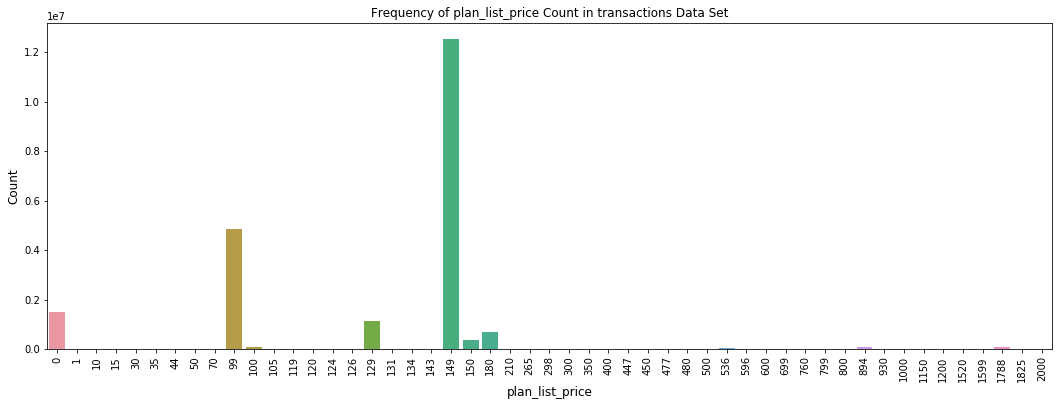

plan_list_price Count [(149, 12536656), (99, 4853433), (0, 1498544), (129, 1144459), (180, 682533), (150, 382860), (894, 109879), (100, 80285), (1788, 80066), (536, 43506), (119, 32280), (480, 22977), (1599, 11463), (477, 10847), (35, 7410), (799, 6264), (300, 5828), (120, 5821), (1200, 5486), (298, 5272), (930, 5082), (447, 4348), (134, 3743), (450, 1455), (500, 1185), (50, 1051), (699, 915), (1000, 750), (124, 598), (350, 587), (131, 374), (105, 348), (400, 342), (70, 250), (143, 143), (2000, 118), (1, 113), (1150, 103), (126, 99), (596, 70), (10, 67), (15, 50), (210, 26), (265, 21), (1520, 13), (800, 11), (30, 6), (760, 3), (600, 3), (1825, 2), (44, 1)]


In [97]:
# plan_list_price count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()
plan_list_price_count = Counter(transactions['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

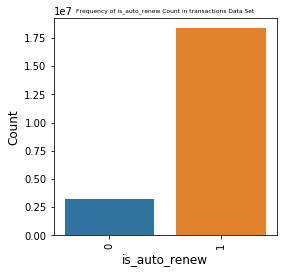

is_auto_renew Count [(1, 18357950), (0, 3189796)]


In [98]:
# is_auto_renew count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_auto_renew Count in transactions Data Set", fontsize=6)
plt.show()
is_auto_renew_count = Counter(transactions['is_auto_renew']).most_common()
print("is_auto_renew Count " +str(is_auto_renew_count))

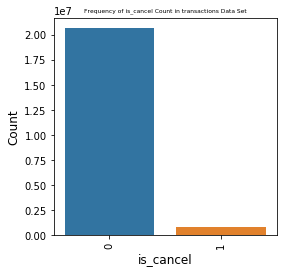

is_cancel Count [(0, 20690895), (1, 856851)]


In [99]:
# is_cancel count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_cancel Count in transactions Data Set", fontsize=6)
plt.show()
is_cancel_count = Counter(transactions['is_cancel']).most_common()
print("is_cancel Count " +str(is_cancel_count))